# Noise Waves
Michael B. Eller
_________________
### Introduction
There are a lot of different ways to think about noise. Noise represented in terms of voltages and currents (with corresponding impedance and admittance parameters) is fairly common; however, for the same reasons that microwave circuits are often represented in terms of waves (scattering parameters), thinking of noise in terms of waves is also advantageous at higher frequencies.

The wave regime for noise is advantageous for several reasons but chief among them are:
* Amenable to signal flow graph theory and algorithmic / computer aided design
* Naturally represented alongside scattering parameters
* Wave parameters are easier to measure at higher frequency as broadband opens and shorts (required for measuring impedance and admittance parameters) are much harder to make than a broadband 50 Ohm load.

Noise waves for a multiport network are defined as outwardly directed correlated sources that are perfectly launched onto each port. A two-port example is shown below:

![noisewaves](figures/noisewaves.png)

Noise waves $c_1$ and $c_2$ are perfectly launched from the noiseless network. The linear combination of incident, reflected, and noise waves is given here:

$$\begin{pmatrix}b_1\\b_2\end{pmatrix}=\begin{pmatrix}S_{11} & S_{12}\\S_{21} & S_{22}\end{pmatrix}\begin{pmatrix}a_1\\a_2\end{pmatrix}+\begin{pmatrix}c_1\\c_2\end{pmatrix}$$

The noise wave amplitudes are still of units $\frac{V}{\sqrt{\Omega}}$; however, noise is of course non-deterministic so the only measureable or meaningful quantities are statistical averages. Characterization of the noise wave amplitudes is done with the noise wave correlation matrix:

$$\textbf{C}_s = \overline{\textbf{cc}^ \dagger}$$

where $\dagger$ denotes the hermitian transpose and the overline denotes a correlation product. The diagonal elements of the noise wave correlation matrix (NWCM) gives the stastistical expectation of the noise power from each port, while the off-diagonal terms give the cross-correlation of the the noise waves.

$$\textbf{C}_s=\begin{pmatrix}\overline{|c_1|^2} & \overline{c_1c_2^*}\\\overline{c_2c_1^*} & \overline{|c_2|^2}\end{pmatrix}$$

### Passive Linear Multiports
S.W. Wedge in his 1991 paper [1] explains that for a passive linear multiport in thermodynamic equilibrium, the noise wave correlation matrix of the network is completely defined by the scattering parameters of the network (Bosma's Theorem):

$$\textbf{C}_s=k_BT(\textbf{I} - \textbf{SS}^\dagger)$$

Again, for a passive network the noise properties are known if the scattering parameters are known. This is a powerful tool for calculating the noise figures of arbitrary N-port passive networks. This of course means that the noise properties of arbitrary connected/cascaded passive networks are known without any additional calculation.

Generally, the noise figure of any network with reflectionless ports at port $i$ is given by [2]:
$$NF_i=1+\frac{\textbf{C}_{sii}}{k_BT\sum_{j\ne i}|S_{ij}|^2}$$

For a passive linear network in thermodynamic equilibrium this reduces to:
$$NF_i=1+\frac{1-|S_{ii}|^2}{\sum_{j\ne i}|S_{ij}|^2}$$

#### Example 1 - Noise Figure of Passive Networks
____
Below are the s-parameters and noise figures of two microstrip coupler models created in ADS. The skrf calculated noise figures are compared with ADS (AC noise simulation).

In [4]:
import sys
sys.path.insert(0, '../../../../')
import skrf as rf
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import Boltzmann as kB
plt.style.use('bmh')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

In [2]:
freqs = rf.frequency.Frequency(0.5, 6, 551, 'ghz')
H180 = rf.Network("data/Hybrid180_ADS_MLIN_290K.s4p")
H90 = rf.Network("data/Hybrid90_ADS_MLIN_290K.s4p")
H180.resample(freqs)
H90.resample(freqs)

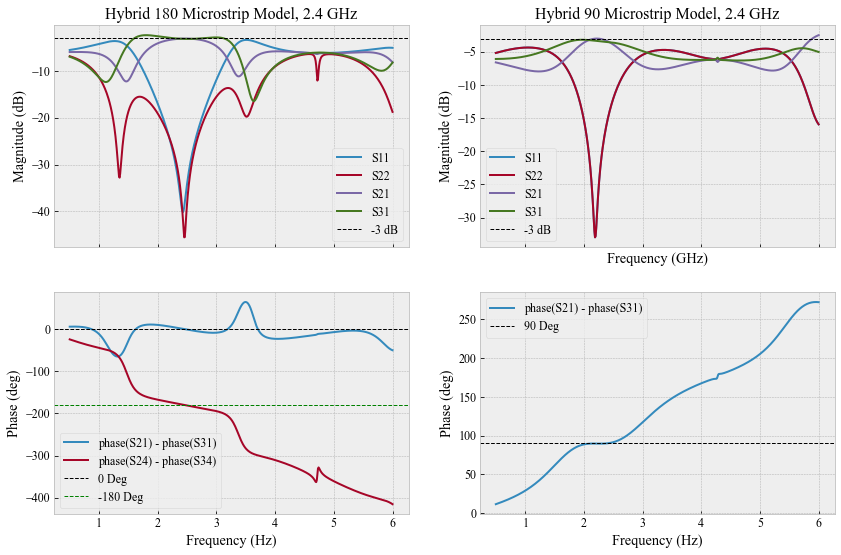

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(14, 9), sharex=True)
axs[0, 0].set_title("Hybrid 180 Microstrip Model, 2.4 GHz", fontsize=16)
axs[0, 1].set_title("Hybrid 90 Microstrip Model, 2.4 GHz", fontsize=16)

H180.s11.plot_s_db(ax=axs[0, 0], label="S11")
H180.s22.plot_s_db(ax=axs[0, 0], label="S22")
H180.s21.plot_s_db(ax=axs[0, 0], label="S21")
H180.s31.plot_s_db(ax=axs[0, 0], label="S31")
axs[0, 0].axhline(-3, color="k", ls="--", lw=1, label="-3 dB")

H180_diff1 = H180.s21.s_deg_unwrap - H180.s31.s_deg_unwrap
H180_diff4 = H180.s24.s_deg_unwrap - H180.s34.s_deg_unwrap

axs[1, 0].plot(H180.f, H180_diff1[:, 0, 0], label="phase(S21) - phase(S31)")
axs[1, 0].plot(H180.f, H180_diff4[:, 0, 0], label="phase(S24) - phase(S34)")

H90.s11.plot_s_db(ax=axs[0, 1], label="S11")
H90.s22.plot_s_db(ax=axs[0, 1], label="S22")
H90.s21.plot_s_db(ax=axs[0, 1], label="S21")
H90.s31.plot_s_db(ax=axs[0, 1], label="S31")
axs[0, 1].axhline(-3, color="k", ls="--", lw=1, label="-3 dB")

H90_diff1 = H90.s21.s_deg_unwrap - H90.s31.s_deg_unwrap

axs[1][1].plot(H90.f, H90_diff1[:, 0, 0], label="phase(S21) - phase(S31)")

axs[0, 0].set_xlabel("")
axs[1, 0].set_xlabel("Frequency (Hz)")
axs[1, 1].set_xlabel("Frequency (Hz)")
axs[1, 0].set_ylabel("Phase (deg)")
axs[1, 1].set_ylabel("Phase (deg)")
axs[1, 0].axhline(0, color="k", ls="--", lw=1, label="0 Deg")
axs[1, 0].axhline(-180 , color="g", ls="--", lw=1, label="-180 Deg")
axs[1, 1].axhline(90 , color="k", ls="--", lw=1, label="90 Deg")

for a in axs.flatten():
    a.legend()

plt.show()

In [4]:
H180_f = []
H180_nf1 = []
H180_nf2 = []
H180_nf3 = []
H180_nf4 = []
with open("data/ADS Benchmarks/Hybrid180_ADS_MLIN_290K.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            H180_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            H180_f.append(float(freq[0]))
        
        H180_nf1.append(float(row[1]))
        H180_nf2.append(float(row[2]))
        H180_nf3.append(float(row[3]))
        H180_nf4.append(float(row[4]))
        
H90_f = []
H90_nf1 = []
H90_nf2 = []
H90_nf3 = []
H90_nf4 = []
with open("data/ADS Benchmarks/Hybrid90_ADS_MLIN_290K.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            H90_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            H90_f.append(float(freq[0]))
        
        H90_nf1.append(float(row[1]))
        H90_nf2.append(float(row[2]))
        H90_nf3.append(float(row[3]))
        H90_nf4.append(float(row[4]))

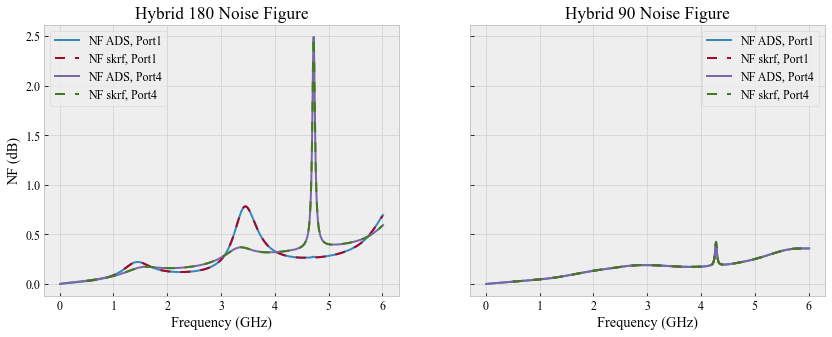

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)
axs[0].set_title("Hybrid 180 Noise Figure")
axs[0].set_xlabel("Frequency (GHz)")
axs[0].set_ylabel("NF (dB)")
axs[1].set_title("Hybrid 90 Noise Figure")
axs[1].set_xlabel("Frequency (GHz)")

axs[0].plot(H180_f, H180_nf1, label="NF ADS, Port1")
axs[0].plot(H180.f/1e9, H180.nf_w(Ta=290, dB=True)[:, 0], "--", label="NF skrf, Port1", dashes=(5, 5))

axs[0].plot(H180_f, H180_nf4, label="NF ADS, Port4")
axs[0].plot(H180.f/1e9, H180.nf_w(Ta=290, dB=True)[:, 3], "--", label="NF skrf, Port4", dashes=(5, 5))

axs[1].plot(H90_f, H90_nf1, label="NF ADS, Port1")
axs[1].plot(H90.f/1e9, H90.nf_w(Ta=290, dB=True)[:, 0], "--", label="NF skrf, Port1", dashes=(5, 5))

axs[1].plot(H90_f, H90_nf4, label="NF ADS, Port4")
axs[1].plot(H90.f/1e9, H90.nf_w(Ta=290, dB=True)[:, 3], "--", label="NF skrf, Port4", dashes=(5, 5))

for a in axs:
    a.legend()
plt.show()

### Noise Waves and Active Networks

The noise wave correlation matrix of active networks is not as readily available as it is for passive networks. Direct measurements are often required to accurately determine the elements of the noise wave correlation matrix / noise parameters of active networks. Below is an example with the Mini-Circuits SAV-541+ microwave EpHEMT. The noise parameters were measured via source tuner and noise figure measurements.

#### Example 2 - Microwave Transistor Amplifier

In [6]:
SAV_f = []
SAV_nf1 = []
SAV_nf2 = []
SAV_nfmin = []
SAV_Rn = []
SAV_Sopt = []
with open("data/ADS Benchmarks/SAV_541_S2_3V_60mA_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            SAV_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            SAV_f.append(float(freq[0]))
        
        SAV_nf1.append(float(row[1]))
        SAV_nf2.append(float(row[2]))
        SAV_nfmin.append(float(row[3]))
        SAV_Rn.append(float(row[4]))
        sopt = row[5].split(" / ")
        sopt = float(sopt[0]) * np.cos(np.deg2rad(float(sopt[1]))) + \
        1j * float(sopt[0]) * np.sin(np.deg2rad(float(sopt[1])))
        SAV_Sopt.append(sopt)

In [7]:
sav = rf.Network("data/SAV_541_S2_3V_60mA.s2p")
sav.resample(freqs)

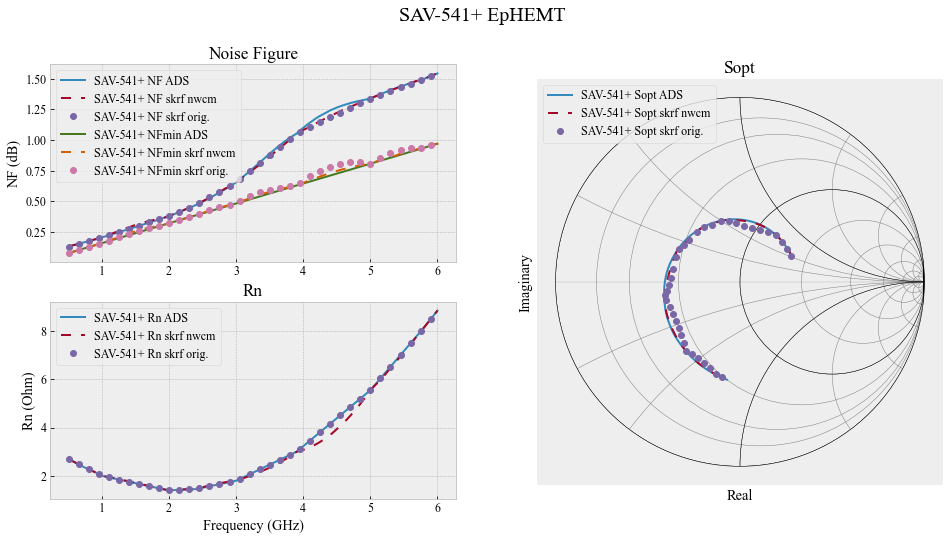

In [8]:
fig = plt.figure(figsize=(16, 8))
grid = plt.GridSpec(2, 2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[:, 1])

plt.suptitle("SAV-541+ EpHEMT", fontsize=20)
ax1.set_title("Noise Figure")
ax2.set_title("Rn")
ax2.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("NF (dB)")
ax2.set_ylabel("Rn (Ohm)")

ax1.plot(SAV_f, SAV_nf2, label="SAV-541+ NF ADS")
ax1.plot(sav.f/1e9, sav.nf_w(Ta=290, dB=True)[:, 1], "--", dashes=(5, 5), label="SAV-541+ NF skrf nwcm")
ax1.plot(sav.f/1e9, 10*np.log10(sav.nf(50)), "o", markevery=15, label="SAV-541+ NF skrf orig.")

ax1.plot(SAV_f, SAV_nfmin, label="SAV-541+ NFmin ADS")
ax1.plot(sav.f/1e9, sav.nfmin_w(dB=True), "--", dashes=(5, 5), label="SAV-541+ NFmin skrf nwcm")
ax1.plot(sav.f/1e9, sav.nfmin_db, "o", markevery=15, label="SAV-541+ NFmin skrf orig.")

ax2.plot(SAV_f, SAV_Rn, label="SAV-541+ Rn ADS")
ax2.plot(sav.f/1e9, sav.rn_w(Ta=290), "--", dashes=(5, 5), label="SAV-541+ Rn skrf nwcm")
ax2.plot(sav.f/1e9, sav.rn, "o", markevery=15, label="SAV-541+ Rn skrf orig.")

rf.plotting.plot_smith(np.array(SAV_Sopt), label="SAV-541+ Sopt ADS", ax=ax3)
rf.plotting.plot_smith(sav.gopt_w(), ls="--", dashes=(5, 5), label="SAV-541+ Sopt skrf nwcm", ax=ax3)
rf.plotting.plot_smith(sav.g_opt, ls="", marker="o", markevery=15, label="SAV-541+ Sopt skrf orig.")

ax3.set_title("Sopt")
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

### Subnetwork Growth and the NWCM

Scikit-rf uses subnetwork growth in order to calculate the equivalent scattering matrices of arbitrarily connected multiport networks. In his 1991 dissertation, S.W. Wedge also outlines this procedure for noise waves. Essentially, there are two cases of connections: inter-connections and intra-connections. In the case of an inter-connection (connecting two ports of separate networks), Scikit-rf smartly builds a composite matrix and performs the intra-connection algorithm on the two ports. Then the extra dimensions of the scattering matrix are deleted. In this way, only the intra-connection needs to be implemented fully.

This noise wave update to skrf implements S.W. Wedge's noise wave intra-connection algorithm alongside skrf's. This intra-connection algorithm is shown below:

$$
    \overline{c_i^{'} c_j^{'*}} = \overline{c_ic_j^{*}} + 
    \overline{c_lc_k^{*}}\frac{\big( S_{ik}(1-S_{kl})+S_{kk}S_{il} \big)\big( S_{jl}(1-S_{lk})+S_{ll}S_{jk} \big)^*}{|(1-S_{kl})(1-S_{lk})-S_{kk}S_{ll}|^2} + 
    \overline{c_kc_l^{*}}\frac{\big( S_{il}(1-S_{lk})+S_{ll}S_{ik} \big)\big( S_{jk}(1-S_{kl})+S_{kk}S_{jl} \big)^*}{|(1-S_{kl})(1-S_{lk})-S_{kk}S_{ll}|^2} + 
    \overline{|c_l|^2}\frac{\big( S_{ik}(1-S_{kl})+S_{kk}S_{il} \big)\big( S_{jk}(1-S_{kl})+S_{kk}S_{jl} \big)^*}{|(1-S_{kl})(1-S_{lk})-S_{kk}S_{ll}|^2} + 
    \overline{|c_k|^2}\frac{\big( S_{il}(1-S_{lk})+S_{ll}S_{ik} \big)\big( S_{jl}(1-S_{lk})+S_{ll}S_{jk} \big)^*}{|(1-S_{kl})(1-S_{lk})-S_{kk}S_{ll}|^2} + 
    \overline{c_lc_j^{*}}\bigg( \frac{S_{ik}(1-S_{kl})+S_{kk}S_{il}}{(1-S_{kl})(1-S_{lk})-S_{kk}S_{ll}} \bigg) + 
    \overline{c_kc_j^{*}}\bigg( \frac{S_{il}(1-S_{lk})+S_{ll}S_{ik}}{(1-S_{kl})(1-S_{lk})-S_{kk}S_{ll}} \bigg) + 
    \overline{c_ic_l^{*}}\bigg( \frac{S_{jk}(1-S_{kl})+S_{kk}S_{jl}}{(1-S_{kl})(1-S_{lk})-S_{kk}S_{ll}} \bigg)^* + 
    \overline{c_ic_k^{*}}\bigg( \frac{S_{jl}(1-S_{lk})+S_{ll}S_{jk}}{(1-S_{kl})(1-S_{lk})-S_{kk}S_{ll}} \bigg)^*
$$

The subscripts $l$ and $k$ denote the ports to be connected. This function iterates over $i$ and $j$ to form the new NWCM.

#### Example 3 - Balanced Amplifier
____
<img src="figures/balanced_amps.png" alt="drawing" width="400"/>

This is a quick example of how calculating the noise properties of connected active and passive networks is possible with this update.

In [9]:
load = rf.Network('data/Load_50Ohm_290K.s1p')
load.resample(freqs)

In [10]:
# make some connections
u00 = rf.network.connect(H90, 3, load, 0)
u01 = rf.network.connect(H90, 1, load, 0)
u1 = rf.network.connect(sav, 0, u00, 1)
u1.renumber([0, 1, 2], [1, 0, 2])
u2 = rf.network.connect(sav, 0, u1, 2)
u2.renumber([0, 1, 2], [2, 0, 1])
u3 = rf.network.connect(u2, 1, u01, 0)
ba = rf.network.innerconnect(u3, 1, 3)

In [11]:
BA_f = []
BA_nf1 = []
BA_nf2 = []
BA_nfmin = []
BA_Rn = []
BA_Sopt = []
with open("data/ADS Benchmarks/Balanced_Amps_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            BA_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            BA_f.append(float(freq[0]))
        
        BA_nf1.append(float(row[1]))
        BA_nf2.append(float(row[2]))
        BA_nfmin.append(float(row[3]))
        BA_Rn.append(float(row[4]))
        sopt = row[5].split(" / ")
        sopt = float(sopt[0]) * np.cos(np.deg2rad(float(sopt[1]))) + \
        1j * float(sopt[0]) * np.sin(np.deg2rad(float(sopt[1])))
        BA_Sopt.append(sopt)

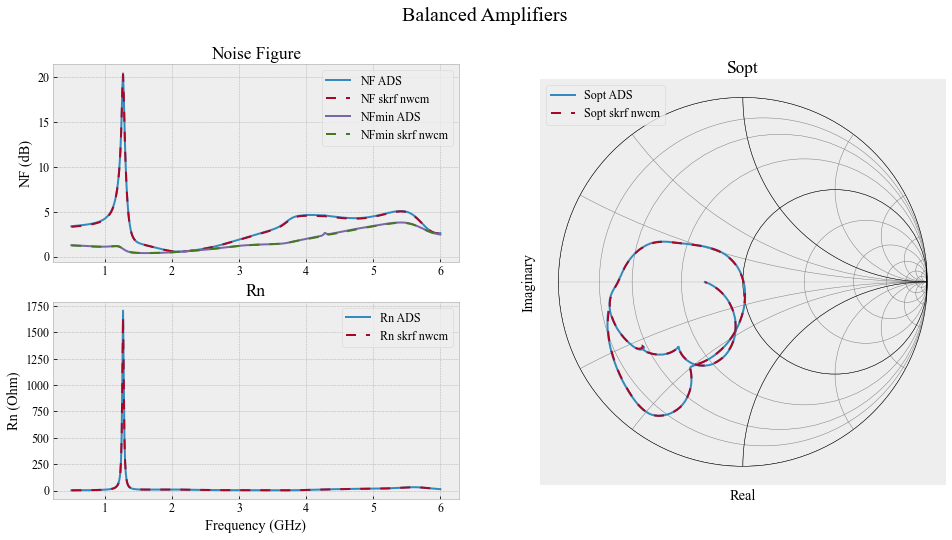

In [12]:
fig = plt.figure(figsize=(16, 8))
grid = plt.GridSpec(2, 2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[:, 1])

plt.suptitle("Balanced Amplifiers", fontsize=20)
ax1.set_title("Noise Figure")
ax2.set_title("Rn")
ax2.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("NF (dB)")
ax2.set_ylabel("Rn (Ohm)")

ax1.plot(BA_f, BA_nf2, label="NF ADS")
ax1.plot(ba.f/1e9, ba.nf_w(Ta=290, dB=True)[:, 1], "--", dashes=(5, 5), label="NF skrf nwcm")

ax1.plot(BA_f, BA_nfmin, label="NFmin ADS")
ax1.plot(ba.f/1e9, ba.nfmin_w(dB=True), "--", dashes=(5, 5), label="NFmin skrf nwcm")

ax2.plot(BA_f, BA_Rn, label="Rn ADS")
ax2.plot(ba.f/1e9, ba.rn_w(Ta=290), "--", dashes=(5, 5), label="Rn skrf nwcm")

rf.plotting.plot_smith(np.array(BA_Sopt), label="Sopt ADS", ax=ax3)
rf.plotting.plot_smith(ba.gopt_w(), ls="--", dashes=(5, 5), label="Sopt skrf nwcm", ax=ax3)

ax3.set_title("Sopt")
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

Just to reiterate, this is not possible with the current implementation of noise in skrf.

### Basic Linear Noise Power Simulations

The noise figure of a multiport at port $i$ can also be generalized as:
$$NF_i = \frac{\frac{v_{n_i}^2}{R_i}+\sum_{j\ne i}^{N}kT_aB|S_{ij}|^2}{\sum_{j\ne i}^{N}kT_aB|S_{ij}|^2}$$
Therefore,
$$\frac{v_{n_i}^2}{R_i}=\big(NF_i-1\big)\sum_{j\ne i}^{N}kT_aB|S_{ij}|^2$$

To include incident noise waves, the expression can be modified as follows:

$$\frac{v_{n_i}^2}{R_i}=\big(NF_i-1\big)\sum_{j\ne i}^{N}kT_aB|S_{ij}|^2 + \sum_{j\ne i}^{N}kT_jB|S_{ij}|^2 + kT_iB\big|(1+S_{ii})\big|^2$$

Where $T_j$ is the input noise equivalent temperature at port $j$.

The following equation can account for input thermal noise (uncorrelated) and arbitrary input noise voltages that *may* be correlated. If thermal input noise is specified, set input temperature column vector. If potentially correlated sources are specified, set the input noise voltage column vector (set to None by default). The noise correlation matrix of the inputs must also be set.

$$\frac{v_{n_i}^2}{R_i}=\big(NF(i)-1\big)\sum_{j\ne i}^{N}kT_aB|S_{ij}|^2 + 
\sum_{j\ne i}^{N}kT_jB|S_{ij}|^2 + 
kT_iB\big|(1+S_{ii})\big|^2 + 
\sum_{j\ne i}^{N}\bigg|\frac{v_{n_j}}{\sqrt{R_j}}S_{ij}\bigg|^2 + 
\bigg|\frac{v_{n_i}}{\sqrt{R_i}}(1 + S_{ii})\bigg|^2 + \\
\sum_{j\ne i}^{N}\sum_{k\ne j}^{N}\sqrt{\bigg|\frac{v_j}{\sqrt{R_j}}\bigg|^2\bigg|\frac{v_k}{\sqrt{R_k}}\bigg|^2}\big( C_{jk}S_{ij}S_{ik}^* \big) + 
\sum_{k=1, k\ne i, j=i}^{k=N}\sqrt{\bigg|\frac{v_j}{\sqrt{R_j}}\bigg|^2\bigg|\frac{v_k}{\sqrt{R_k}}\bigg|^2}\big( C_{jk}(1+S_{ij})S_{ik}^* \big) + \\
\sum_{j=1, j\ne i, k=i}^{j=N}\sqrt{\bigg|\frac{v_j}{\sqrt{R_j}}\bigg|^2\bigg|\frac{v_k}{\sqrt{R_k}}\bigg|^2}\big( C_{jk}S_{ij}(1+S_{ik})^* \big)$$

#### Example 4 - Calculating Noise Power
____
Basic example of using the above function to calculate the noise powers present at each termination of the Quadrature Hybrid given arbitrary noise inputs at each port.

In [13]:
# thermal noise from each termination
input_temps = np.array([[
    [290],
    [290],
    [290],
    [290]
] for f in H90.f])

"""
    Input Noise Sources
"""

# equivalent to an ENR of 15.3 dB
# define equal voltage noise sources at ports 1 and 2
vn = np.sqrt(kB*1e6*10.116e3*50)
input_voltages = np.array([[
    [vn],
    [vn],
    [0],
    [0]
] for f in H90.f])

# cross-correlation of the input voltage sources
# this is a sparse matrix but the correlation and its conjugate must be filled
C = np.zeros((H90.f.size, H90.number_of_ports, H90.number_of_ports), dtype=complex)
C[:, 0, 1] = np.array([1/np.sqrt(2)*(-1+1j) for f in H90.f])
C[:, 1, 0] = np.array([1/np.sqrt(2)*(-1-1j) for f in H90.f])

# perform noise power calculations
outputs90 = H90.calculate_noise_powers(input_temps, input_voltages, cC=C, bw=1e6)

In [14]:
vi_f = []
P1 = []
P2 = []
P3 = []
P4 = []
with open("data/ADS Benchmarks/Powers90_vi_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            vi_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            vi_f.append(float(freq[0]))
        
        P1.append(float(row[1]))
        P2.append(float(row[2]))
        P3.append(float(row[3]))
        P4.append(float(row[4]))

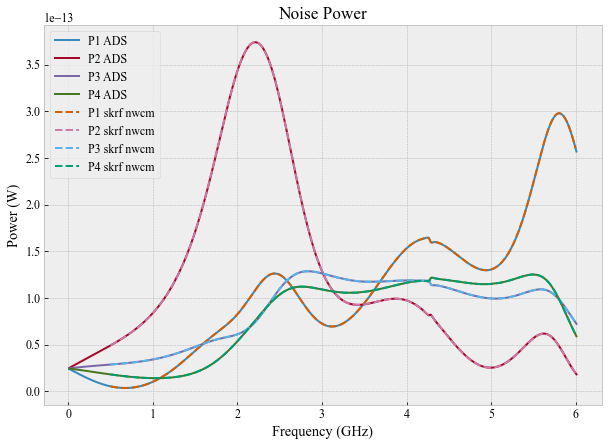

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = plt.gca()

plt.title("Noise Power")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Power (W)")

plt.plot(vi_f, P1, label="P1 ADS")
plt.plot(vi_f, P2, label="P2 ADS")
plt.plot(vi_f, P3, label="P3 ADS")
plt.plot(vi_f, P4, label="P4 ADS")

plt.plot(H90.f/1e9, outputs90[:, 0], "--", label="P1 skrf nwcm")
plt.plot(H90.f/1e9, outputs90[:, 1], "--", label="P2 skrf nwcm")
plt.plot(H90.f/1e9, outputs90[:, 2], "--", label="P3 skrf nwcm")
plt.plot(H90.f/1e9, outputs90[:, 3], "--", label="P4 skrf nwcm")

plt.legend()
plt.show()

#### Example 5 - Measuring Correlation of Input Noise
____
This example will follow some of the findings in **[1].** The cross-correlation of input noise can be measured using 90 and 180 degree hybrid couplers.

In [23]:
vi_90_f = []
P1_90 = []
P2_90 = []
P3_90 = []
P4_90 = []
with open("data/ADS Benchmarks/Powers90_cc_mr_pi_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            vi_90_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            vi_90_f.append(float(freq[0]))
        
        P1_90.append(float(row[1]))
        P2_90.append(float(row[2]))
        P3_90.append(float(row[3]))
        P4_90.append(float(row[4]))
P1_90 = np.array(P1_90)
P2_90 = np.array(P2_90)
P3_90 = np.array(P3_90)
P4_90 = np.array(P4_90)

vi_180_f = []
P1_180 = []
P2_180 = []
P3_180 = []
P4_180 = []
with open("data/ADS Benchmarks/Powers180_cc_mr_pi_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            vi_180_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            vi_180_f.append(float(freq[0]))
        
        P1_180.append(float(row[1]))
        P2_180.append(float(row[2]))
        P3_180.append(float(row[3]))
        P4_180.append(float(row[4]))
P1_180 = np.array(P1_180)
P2_180 = np.array(P2_180)
P3_180 = np.array(P3_180)
P4_180 = np.array(P4_180)

In [24]:
# thermal noise from each termination
input_temps = np.array([[
    [290],
    [290],
    [290],
    [290]
] for f in H90.f])

"""
    Input Noise Source
"""

# equivalent to an ENR of 15.3 dB
vn = np.sqrt(kB*1e6*10.116e3*50)
input_voltages = np.array([[
    [vn],
    [0],
    [0],
    [vn]
] for f in H90.f])

# cross-correlation of the input voltage sources
C = np.zeros((H90.f.size, H90.number_of_ports, H90.number_of_ports), dtype=complex)
C[:, 0, 3] = np.array([1/np.sqrt(2)*(-1+1j) for f in H90.f])
C[:, 3, 0] = np.array([1/np.sqrt(2)*(-1-1j) for f in H90.f])

# perform noise power calculations
outputs90 = H90.calculate_noise_powers(input_temps, input_voltages, cC=C, bw=1e6)
outputs180 = H180.calculate_noise_powers(input_temps, input_voltages, cC=C, bw=1e6)
real = (outputs180[:, 2, 0] - outputs180[:, 1, 0]) / 2
imag = (outputs90[:, 2, 0] - outputs90[:, 1, 0]) / 2

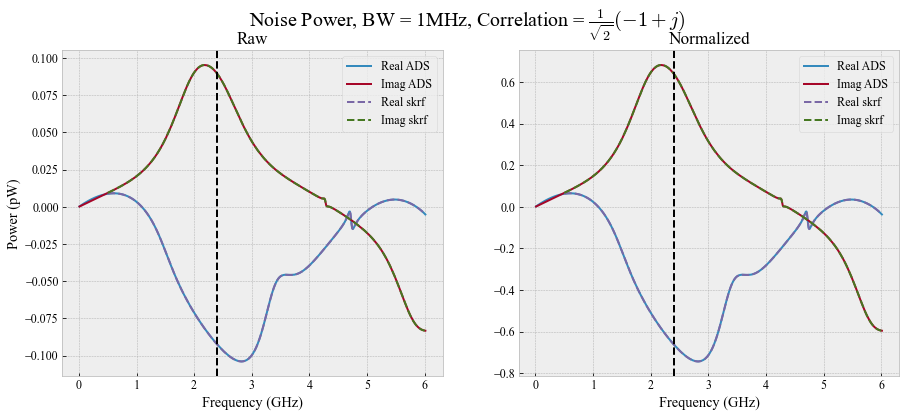

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle(r"Noise Power, BW = 1MHz, Correlation = $\frac{1}{\sqrt{2}}(-1+j)$", fontsize=20)
axs[0].set_title("Raw")
axs[1].set_title("Normalized")
axs[0].set_ylabel("Power (pW)")
axs[0].set_xlabel("Frequency (GHz)")
axs[1].set_xlabel("Frequency (GHz)")

axs[0].plot(vi_180_f, (P3_180 - P2_180) / 2 * 1e12, label="Real ADS")
axs[0].plot(vi_90_f, (P3_90 - P2_90) / 2 * 1e12, label="Imag ADS")
axs[0].plot(H180.f/1e9, real*1e12, "--", label="Real skrf")
axs[0].plot(H90.f/1e9, imag*1e12, "--", label="Imag skrf")

norm = np.sqrt(np.abs(vn/np.sqrt(50))**2 * np.abs(vn/np.sqrt(50))**2)
axs[1].plot(vi_180_f, (P3_180 - P2_180) / 2 / norm, label="Real ADS")
axs[1].plot(vi_90_f, (P3_90 - P2_90) / 2 / norm, label="Imag ADS")
axs[1].plot(H180.f/1e9, real/norm, "--", label="Real skrf")
axs[1].plot(H90.f/1e9, imag/norm, "--", label="Imag skrf")

axs[0].axvline(2.4, color="k", ls="--", lw=2)
axs[1].axvline(2.4, color="k", ls="--", lw=2)
axs[0].legend()
axs[1].legend()
plt.show()

In [27]:
vi_90_f = []
P1_90 = []
P2_90 = []
P3_90 = []
P4_90 = []
with open("data/ADS Benchmarks/Powers90_cc_pr_mi_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            vi_90_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            vi_90_f.append(float(freq[0]))
        
        P1_90.append(float(row[1]))
        P2_90.append(float(row[2]))
        P3_90.append(float(row[3]))
        P4_90.append(float(row[4]))
P1_90 = np.array(P1_90)
P2_90 = np.array(P2_90)
P3_90 = np.array(P3_90)
P4_90 = np.array(P4_90)

vi_180_f = []
P1_180 = []
P2_180 = []
P3_180 = []
P4_180 = []
with open("data/ADS Benchmarks/Powers180_cc_pr_mi_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            vi_180_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            vi_180_f.append(float(freq[0]))
        
        P1_180.append(float(row[1]))
        P2_180.append(float(row[2]))
        P3_180.append(float(row[3]))
        P4_180.append(float(row[4]))
P1_180 = np.array(P1_180)
P2_180 = np.array(P2_180)
P3_180 = np.array(P3_180)
P4_180 = np.array(P4_180)

In [28]:
# thermal noise from each termination
input_temps = np.array([[
    [290],
    [290],
    [290],
    [290]
] for f in H90.f])

"""
    Input Noise Source
"""

# equivalent to an ENR of 15.3 dB
vn = np.sqrt(kB*1e6*10.116e3*50)
input_voltages = np.array([[
    [vn],
    [0],
    [0],
    [vn]
] for f in H90.f])

# cross-correlation of the input voltage sources
C = np.zeros((H90.f.size, H90.number_of_ports, H90.number_of_ports), dtype=complex)
C[:, 0, 3] = np.array([1/np.sqrt(2)*(1-1j) for f in H90.f])
C[:, 3, 0] = np.array([1/np.sqrt(2)*(1+1j) for f in H90.f])

# perform noise power calculations
outputs90 = H90.calculate_noise_powers(input_temps, input_voltages, cC=C, bw=1e6)
outputs180 = H180.calculate_noise_powers(input_temps, input_voltages, cC=C, bw=1e6)
real = (outputs180[:, 2, 0] - outputs180[:, 1, 0]) / 2
imag = (outputs90[:, 2, 0] - outputs90[:, 1, 0]) / 2

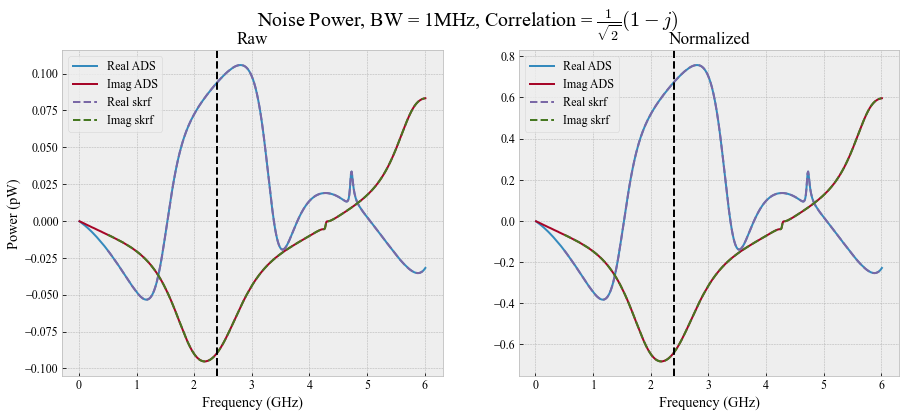

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle(r"Noise Power, BW = 1MHz, Correlation = $\frac{1}{\sqrt{2}}(1-j)$", fontsize=20)
axs[0].set_title("Raw")
axs[1].set_title("Normalized")
axs[0].set_ylabel("Power (pW)")
axs[0].set_xlabel("Frequency (GHz)")
axs[1].set_xlabel("Frequency (GHz)")

axs[0].plot(vi_180_f, (P3_180 - P2_180) / 2 * 1e12, label="Real ADS")
axs[0].plot(vi_90_f, (P3_90 - P2_90) / 2 * 1e12, label="Imag ADS")
axs[0].plot(H180.f/1e9, real*1e12, "--", label="Real skrf")
axs[0].plot(H90.f/1e9, imag*1e12, "--", label="Imag skrf")

norm = np.sqrt(np.abs(vn/np.sqrt(50))**2 * np.abs(vn/np.sqrt(50))**2)
axs[1].plot(vi_180_f, (P3_180 - P2_180) / 2 / norm, label="Real ADS")
axs[1].plot(vi_90_f, (P3_90 - P2_90) / 2 / norm, label="Imag ADS")
axs[1].plot(H180.f/1e9, real/norm, "--", label="Real skrf")
axs[1].plot(H90.f/1e9, imag/norm, "--", label="Imag skrf")

axs[0].axvline(2.4, color="k", ls="--", lw=2)
axs[1].axvline(2.4, color="k", ls="--", lw=2)
axs[0].legend()
axs[1].legend()
plt.show()

In [31]:
vi_90_f = []
P1_90 = []
P2_90 = []
P3_90 = []
P4_90 = []
with open("data/ADS Benchmarks/Powers90_nocc_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            vi_90_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            vi_90_f.append(float(freq[0]))
        
        P1_90.append(float(row[1]))
        P2_90.append(float(row[2]))
        P3_90.append(float(row[3]))
        P4_90.append(float(row[4]))
P1_90 = np.array(P1_90)
P2_90 = np.array(P2_90)
P3_90 = np.array(P3_90)
P4_90 = np.array(P4_90)

vi_180_f = []
P1_180 = []
P2_180 = []
P3_180 = []
P4_180 = []
with open("data/ADS Benchmarks/Powers180_nocc_ADS.csv", "r") as datafile:
    reader = csv.reader(datafile)
    next(reader)
    for row in reader:
        freq = row[0].split(" ")
        if freq[1][0] == "M":
            vi_180_f.append(float(freq[0]) / 1000)
        elif freq[1][0] == "G":
            vi_180_f.append(float(freq[0]))
        
        P1_180.append(float(row[1]))
        P2_180.append(float(row[2]))
        P3_180.append(float(row[3]))
        P4_180.append(float(row[4]))
P1_180 = np.array(P1_180)
P2_180 = np.array(P2_180)
P3_180 = np.array(P3_180)
P4_180 = np.array(P4_180)

In [32]:
# thermal noise from each termination
input_temps = np.array([[
    [290],
    [290],
    [290],
    [290]
] for f in H90.f])

"""
    Input Noise Source
"""

# equivalent to an ENR of 15.3 dB
vn = np.sqrt(kB*1e6*10.116e3*50)
input_voltages = np.array([[
    [vn],
    [0],
    [0],
    [vn]
] for f in H90.f])

# cross-correlation of the input voltage sources
C = np.zeros((H90.f.size, H90.number_of_ports, H90.number_of_ports), dtype=complex)

# perform noise power calculations
outputs90 = H90.calculate_noise_powers(input_temps, input_voltages, cC=C, bw=1e6)
outputs180 = H180.calculate_noise_powers(input_temps, input_voltages, cC=C, bw=1e6)
real = (outputs180[:, 2, 0] - outputs180[:, 1, 0]) / 2
imag = (outputs90[:, 2, 0] - outputs90[:, 1, 0]) / 2

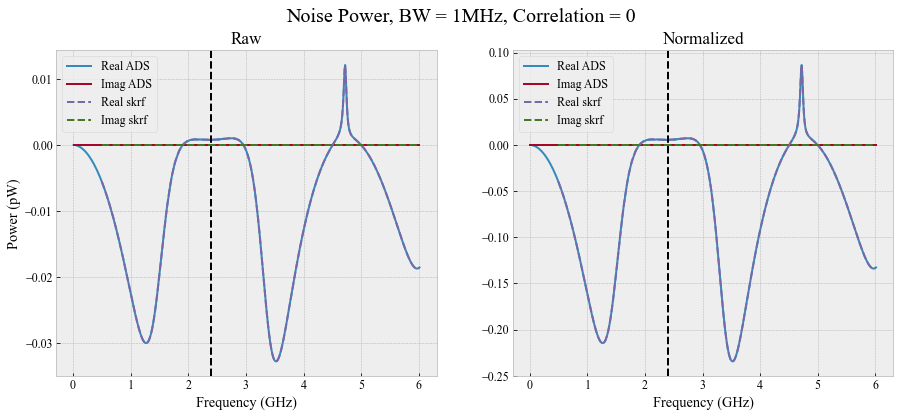

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle(r"Noise Power, BW = 1MHz, Correlation = 0", fontsize=20)
axs[0].set_title("Raw")
axs[1].set_title("Normalized")
axs[0].set_ylabel("Power (pW)")
axs[0].set_xlabel("Frequency (GHz)")
axs[1].set_xlabel("Frequency (GHz)")

axs[0].plot(vi_180_f, (P3_180 - P2_180) / 2 * 1e12, label="Real ADS")
axs[0].plot(vi_90_f, (P3_90 - P2_90) / 2 * 1e12, label="Imag ADS")
axs[0].plot(H180.f/1e9, real*1e12, "--", label="Real skrf")
axs[0].plot(H90.f/1e9, imag*1e12, "--", label="Imag skrf")

norm = np.sqrt(np.abs(vn/np.sqrt(50))**2 * np.abs(vn/np.sqrt(50))**2)
axs[1].plot(vi_180_f, (P3_180 - P2_180) / 2 / norm, label="Real ADS")
axs[1].plot(vi_90_f, (P3_90 - P2_90) / 2 / norm, label="Imag ADS")
axs[1].plot(H180.f/1e9, real/norm, "--", label="Real skrf")
axs[1].plot(H90.f/1e9, imag/norm, "--", label="Imag skrf")

axs[0].axvline(2.4, color="k", ls="--", lw=2)
axs[1].axvline(2.4, color="k", ls="--", lw=2)
axs[0].legend()
axs[1].legend()
plt.show()

As these couplers are not ideal, there is some error; however, the basic principle is evident. The values are obviously only close to the expected value in the narrow bandwidth in which the coupers operate.

### A Note

I very much appreciate the opportunity to contribute to this amazing open-source project. Hopefully the dev group will see value in this work.

This proposed addition to skrf was only possible because of the hard work and intelligence of others. I am grateful to all the authors of Scikit-rf but especially Alex Arsenovic for all his help. My work on this was just simple implementation in python. The real genius of noise waves and noise wave subnetwork growth belongs to Scott Wedge and those who came before him.

The noise power calculation function is my work. Obviously this is built-in to many simulators already, but I had a hard time finding any actual documentation or explanation of what was going on 'under the hood.' A research project I am actively working on requires correlated noise power simulations such as this. It's pretty niche, but I hope someone out there will find it valuable.

All of this code needs to be tested very thoroughly still. Many of the supporting functions have not been modified to accomodate the noise wave objects. I have confirmed that it did not break any unit tests already in skrf.

### References
_____________
**[1]** S. W. Wedge and D. B. Rutledge, "Noise waves and passive linear multiports," in IEEE Microwave and Guided Wave Letters, vol. 1, no. 5, pp. 117-119, May 1991, doi: 10.1109/75.89082.

**[2]** https://ntrs.nasa.gov/api/citations/19910021593/downloads/19910021593.pdf

**[3]** S. W. Wedge, "Computer-Aided Design of Low Noise Microwave Circuits," PhD Thesis.

**[4]** https://edadocs.software.keysight.com/display/ads2008U1/S-Parameter+Simulation+Noise+Analysis